In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

## In this ML Model we investigate the predictive value of Store and Promotion Features on Store Sales

In [6]:
# Import dataset
store_df = pd.read_csv('Resources/store_data.csv')
store_df.head()

,id,food_category,food_department,food_family,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,promotion_name,brand_name,SRP,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,media_type
0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,"Daily Paper, Radio"
1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,"Daily Paper, Radio"
2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,"Daily Paper, Radio"
3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,In-Store Coupon
4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,Golden,1.36,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,Radio


In [7]:
# Check data frame shape
shape = store_df.shape
print(f"Store dataset including {shape[0]} rows and {shape[1]} cloumns.")

Store dataset including 38892 rows and 29 cloumns.


In [8]:
# Check data frame columns
store_df.columns

Index(['id', 'food_category', 'food_department', 'food_family',
       'store_sales_in_millions', 'store_cost_in_millions',
       'unit_sales_in_millions', 'promotion_name', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost',
       'media_type'],
      dtype='object')

In [9]:
# Check datatypes
store_df.dtypes

id                           int64
food_category               object
food_department             object
food_family                 object
store_sales_in_millions    float64
store_cost_in_millions     float64
unit_sales_in_millions     float64
promotion_name              object
brand_name                  object
SRP                        float64
gross_weight               float64
net_weight                 float64
recyclable_package         float64
low_fat                    float64
units_per_case             float64
store_type                  object
store_city                  object
store_state                 object
store_sqft                 float64
grocery_sqft               float64
frozen_sqft                float64
meat_sqft                  float64
coffee_bar                 float64
video_store                float64
salad_bar                  float64
prepared_food              float64
florist                    float64
cost                       float64
media_type          

In [10]:
# Check null values for each column
store_df.isnull().sum()

id                         0
food_category              0
food_department            0
food_family                0
store_sales_in_millions    0
store_cost_in_millions     0
unit_sales_in_millions     0
promotion_name             0
brand_name                 0
SRP                        0
gross_weight               0
net_weight                 0
recyclable_package         0
low_fat                    0
units_per_case             0
store_type                 0
store_city                 0
store_state                0
store_sqft                 0
grocery_sqft               0
frozen_sqft                0
meat_sqft                  0
coffee_bar                 0
video_store                0
salad_bar                  0
prepared_food              0
florist                    0
cost                       0
media_type                 0
dtype: int64

In [11]:
# Generate categorical variable list
cat = store_df.dtypes[store_df.dtypes == 'object'].index.tolist()
cat

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [12]:
# Count the number of categorical variables.
print(f"There are {len(cat)} categorical variables in store data frame.")


There are 9 categorical variables in store data frame.


In [13]:
# Generate a numerical variable list
num = store_df.dtypes[(store_df.dtypes == 'int64') | (store_df.dtypes == 'float64')].index.tolist()
num

['id',
 'store_sales_in_millions',
 'store_cost_in_millions',
 'unit_sales_in_millions',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [14]:
# Count the number of numerical variables.
print(f"There are {len(num)} numerical variables in store data frame.")


There are 20 numerical variables in store data frame.


In [17]:
# Create a new data frame which contains store related numercial variables only.
store_num = store_df[['store_sales_in_millions', 'store_cost_in_millions', 'unit_sales_in_millions', 'store_sqft','grocery_sqft','frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist','cost']]
store_num

,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,5.52,2.5944,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,3.68,1.3616,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16
3,3.68,1.1776,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78
4,4.08,1.4280,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,0.99,0.4554,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,127.19
38888,1.21,0.4477,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,78.45
38889,2.76,1.3248,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,95.25
38890,1.60,0.4960,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,69.42


In [19]:
# Statistic details of the store_mlr data frame
store_num.describe()

,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000
mean,6.515973,2.606900,3.080556,27199.413427,18241.415895,5374.951070,3583.187314,0.562532,0.247583,0.482979,0.482979,0.496066,98.402350
std,3.460749,1.447546,0.832546,5957.915401,3739.762002,1733.637554,1155.559700,0.496081,0.431614,0.499717,0.499717,0.499991,30.434059
min,0.510000,0.170500,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.780000,1.486800,3.000000,21215.000000,15321.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.470000
50%,5.910000,2.371550,3.000000,27694.000000,18670.000000,5011.000000,3340.000000,1.000000,0.000000,0.000000,0.000000,0.000000,98.520000
75%,8.650000,3.475275,4.000000,30268.000000,22123.000000,5633.000000,3755.000000,1.000000,0.000000,1.000000,1.000000,1.000000,126.620000
max,19.900000,9.726500,6.000000,39696.000000,24390.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [20]:
# Count unique values for each numerical variable column
store_df[cat].nunique()

food_category       45
food_department     22
food_family          3
promotion_name      49
brand_name         111
store_type           4
store_city          10
store_state          3
media_type          13
dtype: int64

In [21]:
# Create a new data frame which contains store related categorcial variables only.
store_cat = store_df[['promotion_name','store_type','store_city','store_state','media_type']]
store_cat.head()

,promotion_name,store_type,store_city,store_state,media_type
0,Bag Stuffers,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,Cash Register Lottery,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,High Roller Savings,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
3,Cash Register Lottery,Deluxe Supermarket,Salem,OR,In-Store Coupon
4,Double Down Sale,Deluxe Supermarket,Salem,OR,Radio


## Multiple Linear Regression with LabelEncoder

In [22]:
# Select store related columns only
selected_cols = ['store_sales_in_millions', 'store_cost_in_millions', 'unit_sales_in_millions', 'store_sqft','grocery_sqft',\
    'frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist','cost',\
    'promotion_name','store_type','store_city','store_state','media_type']
selected_store_df = store_df[selected_cols]
selected_store_df.head()


,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,promotion_name,store_type,store_city,store_state,media_type
0,7.36,2.7232,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,Bag Stuffers,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,5.52,2.5944,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,Cash Register Lottery,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,3.68,1.3616,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,High Roller Savings,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
3,3.68,1.1776,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,Cash Register Lottery,Deluxe Supermarket,Salem,OR,In-Store Coupon
4,4.08,1.4280,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,Double Down Sale,Deluxe Supermarket,Salem,OR,Radio


In [23]:
selected_cat = store_cat.columns.values.tolist()
selected_cat

['promotion_name', 'store_type', 'store_city', 'store_state', 'media_type']

In [31]:
# Use LabelEncoder to encode categorical columns.
label_encoder = LabelEncoder()

# selected_store_df.loc[:,selected_cat] = label_encoder.fit_transform(selected_store_df.loc[:,selected_cat])
for var in selected_cat:
    selected_store_df[var] = label_encoder.fit_transform(selected_store_df[var])

selected_store_df

/Users/giannimarco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,promotion_name,store_type,store_city,store_state,media_type
0,7.36,2.7232,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,0,0,5,1,3
1,5.52,2.5944,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,6,0,5,1,3
2,3.68,1.3616,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,18,0,5,1,3
3,3.68,1.1776,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,6,0,5,1,5
4,4.08,1.4280,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,11,0,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,0.99,0.4554,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,127.19,17,2,6,0,1
38888,1.21,0.4477,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,78.45,45,2,6,0,10
38889,2.76,1.3248,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,95.25,48,2,6,0,5
38890,1.60,0.4960,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,69.42,24,2,6,0,9


In [32]:
# Check new data frame infomation.
selected_store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   store_sales_in_millions  38892 non-null  float64
 1   store_cost_in_millions   38892 non-null  float64
 2   unit_sales_in_millions   38892 non-null  float64
 3   store_sqft               38892 non-null  float64
 4   grocery_sqft             38892 non-null  float64
 5   frozen_sqft              38892 non-null  float64
 6   meat_sqft                38892 non-null  float64
 7   coffee_bar               38892 non-null  float64
 8   video_store              38892 non-null  float64
 9   salad_bar                38892 non-null  float64
 10  prepared_food            38892 non-null  float64
 11  florist                  38892 non-null  float64
 12  cost                     38892 non-null  float64
 13  promotion_name           38892 non-null  int64  
 14  store_type            

In [33]:
# Check unique values of each column.
selected_store_df.nunique()


store_sales_in_millions    1011
store_cost_in_millions     8944
unit_sales_in_millions        6
store_sqft                   10
grocery_sqft                 10
frozen_sqft                  10
meat_sqft                    10
coffee_bar                    2
video_store                   2
salad_bar                     2
prepared_food                 2
florist                       2
cost                        214
promotion_name               49
store_type                    4
store_city                   10
store_state                   3
media_type                   13
dtype: int64

In [34]:
# # Export dataset as a new csv file.
# selected_store_df.to_csv('Resources/store_label_encoded.csv')

## Store sales as target

In [35]:
# Split preprocessed data into our features and target arrays
y = selected_store_df['store_sales_in_millions'].values
X = selected_store_df.drop(columns='store_sales_in_millions').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")


X_train: (29169, 17);
X_test: (9723, 17);
y_train: (29169,);
y_test: (9723,);


In [37]:
# Fit the model
mlg = LinearRegression()
mlg.fit(X_train, y_train)


LinearRegression()

In [38]:
# Predict the result
y_pred = mlg.predict(X_test)
y_pred


array([ 4.33302478,  9.51088713,  7.62132685, ...,  6.79792751,
       10.00221974,  6.23329974])

In [39]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) 
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")


Accuracy of multiple linear regression is 0.91.


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

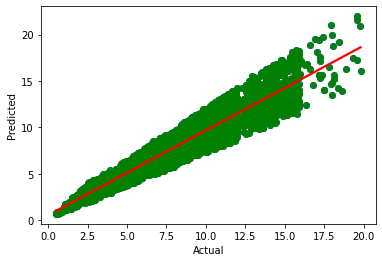

In [40]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"})


### Conclusion: Store & Promotion features are strong predictors of Store Sales

## Heapmap

In [41]:
# Calculating a correalation matrix
matrix = selected_store_df.corr(
    method = 'pearson',     # The method of correlation
    min_periods =1          # Min number of observations required
).round(2)
print(matrix)

                         store_sales_in_millions  store_cost_in_millions  \
store_sales_in_millions                     1.00                    0.95   
store_cost_in_millions                      0.95                    1.00   
unit_sales_in_millions                      0.51                    0.48   
store_sqft                                  0.01                    0.01   
grocery_sqft                               -0.00                   -0.00   
frozen_sqft                                 0.03                    0.03   
meat_sqft                                   0.03                    0.03   
coffee_bar                                 -0.04                   -0.04   
video_store                                 0.01                    0.01   
salad_bar                                   0.03                    0.03   
prepared_food                               0.03                    0.03   
florist                                     0.03                    0.03   
cost        

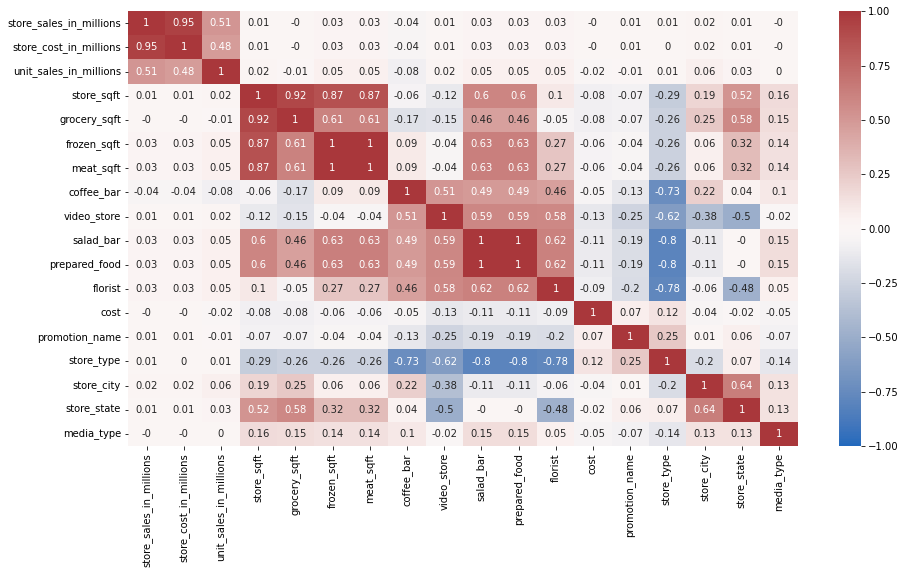

In [42]:
# Visualizing a Pandas correlation matrix using seaborn
plt.figure(figsize = (15,8))
# sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

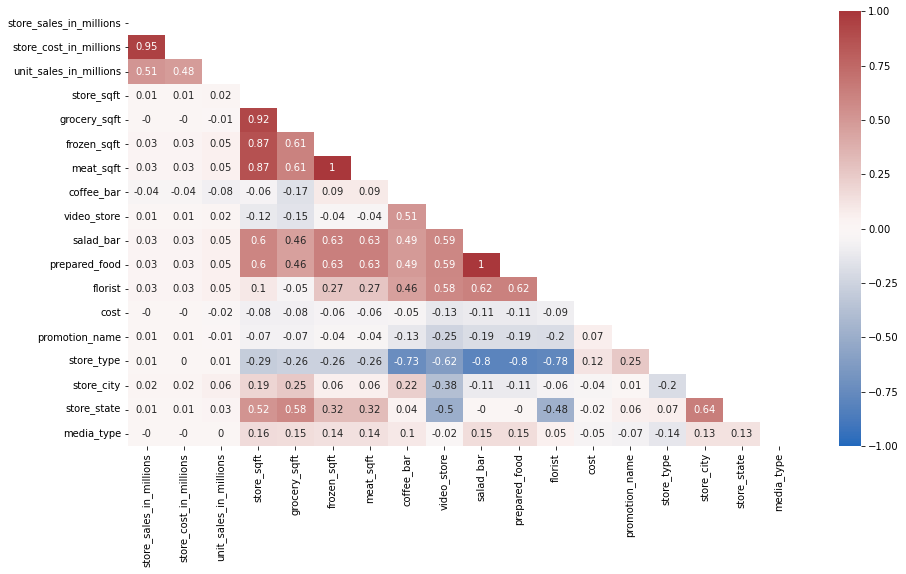

In [43]:
# Show only the bottom half of correclation matrix
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()


In [50]:
# Select only strong correlations in matrix
strong_matrix = matrix.unstack()
strong_matrix = strong_matrix[abs(strong_matrix) >= 0.7]
print(strong_matrix)

store_sales_in_millions  store_sales_in_millions    1.00
                         store_cost_in_millions     0.95
store_cost_in_millions   store_sales_in_millions    0.95
                         store_cost_in_millions     1.00
unit_sales_in_millions   unit_sales_in_millions     1.00
store_sqft               store_sqft                 1.00
                         grocery_sqft               0.92
                         frozen_sqft                0.87
                         meat_sqft                  0.87
grocery_sqft             store_sqft                 0.92
                         grocery_sqft               1.00
frozen_sqft              store_sqft                 0.87
                         frozen_sqft                1.00
                         meat_sqft                  1.00
meat_sqft                store_sqft                 0.87
                         frozen_sqft                1.00
                         meat_sqft                  1.00
coffee_bar               coffee

# Try again Dropping city & state

In [44]:
selected_store_df.drop(['store_city', 'store_state'], axis=1, inplace=True)

selected_store_df

/Users/giannimarco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,promotion_name,store_type,media_type
0,7.36,2.7232,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,0,0,3
1,5.52,2.5944,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,6,0,3
2,3.68,1.3616,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,18,0,3
3,3.68,1.1776,2.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,6,0,5
4,4.08,1.4280,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,11,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,0.99,0.4554,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,127.19,17,2,1
38888,1.21,0.4477,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,78.45,45,2,10
38889,2.76,1.3248,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,95.25,48,2,5
38890,1.60,0.4960,1.0,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,69.42,24,2,9


In [45]:
# Split preprocessed data into our features and target arrays
y = selected_store_df['store_sales_in_millions'].values
X = selected_store_df.drop(columns='store_sales_in_millions').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")


X_train: (29169, 15);
X_test: (9723, 15);
y_train: (29169,);
y_test: (9723,);


In [47]:
# Fit the model
mlg = LinearRegression()
mlg.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict the result
y_pred = mlg.predict(X_test)
y_pred


array([ 4.33302478,  9.51088713,  7.62132685, ...,  6.79792751,
       10.00221974,  6.23329974])

In [49]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) 
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")


Accuracy of multiple linear regression is 0.91.


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

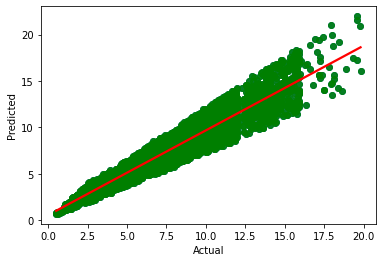

In [50]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"})

### Conclusion: Store location (city & state) has no effect on efficacy of ML Model in predicticting Store Sales based on Store & Promotion features Which is supported by the observed accuracies and correlation matrices above


### Notes: OneHotEncoder has been replaced with LabelEncoder for this finalized model